In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Natural Language Processing with TensorFlow

A handful of example natural language processing (NLP) and natural language understanding (NLU) problems. These are also often referred to as sequence problems (going from one sequence to another).

The main goal of natural language processing (NLP) is to derive information from natural language.

Natural language is a broad term but you can consider it to cover any of the following:

* Text (such as that contained in an email, blog post, book, Tweet)
* Speech (a conversation you have with a doctor, voice commands you give to a smart speaker)

## What we're going to cover
Let's get specific hey?

* Downloading a text dataset
* Visualizing text data
* Converting text into numbers using tokenization
* Turning our tokenized text into an embedding
* Modelling a text dataset
    * Starting with a baseline (TF-IDF)
    * Building several deep learning text models
      * Dense, LSTM, GRU, Conv1D, Transfer learning
* Comparing the performance of each our models
* Combining our models into an ensemble
* Saving and loading a trained model
* Find the most wrong predictions

## Get helper functions


In [2]:
from drive.MyDrive.help import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2024-01-17 08:03:08--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 74.125.20.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2024-01-17 08:03:08 (98.4 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data('nlp_getting_started.zip')

## Visualizing a text dataset

In [5]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [6]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
train_df_shuflled = train_df.sample(frac=1, random_state=42)
train_df_shuflled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [8]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


Since we have two target values, we're dealing with a binary classification problem.

It's fairly balanced too, about 60% negative class (**`target = 0`**) and 40% positive class (**`target = 1`**).

Where,

* 1 = a real disaster Tweet
* 0 = not a real disaster Tweet

In [11]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuflled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f'Text:\n{text}\n')
  print('------------\n')

Target: 0 (not real disaster)
Text:
@ENews Ben Affleck......I know there's a wife/kids and other girls but I can't help it. I've loved him since Armageddon #eonlinechat

------------

Target: 1 (real disaster)
Text:
Mad River Complex fires have burned 14028 acres 8% contained: The Mad River Complex fires in Trinity County ... http://t.co/LfNIPpNOtO

------------

Target: 1 (real disaster)
Text:
Train derailment: In Patna no news of any casualty so far http://t.co/Yg697fcQGr

------------

Target: 1 (real disaster)
Text:
JKL issues Hazardous Weather Outlook (HWO)  http://t.co/4e719w6m4V #WX

------------

Target: 0 (not real disaster)
Text:
@drag0nking0201 *Screams*don't scare me and its Animatronics

------------



## Split data into training and validation sets
Since the test set has no labels and we need a way to evalaute our trained models, we'll split off some of the training data and create a validation set.

When our model trains (tries patterns in the Tweet samples), it'll only see data from the training set and we can see how it performs on unseen data using the validation set.

We'll convert our splits from pandas Series datatypes to lists of strings (for the text) and lists of ints (for the labels) for ease of use later.

To split our training dataset and create a validation dataset, we'll use Scikit-Learn's train_test_split() method and dedicate 10% of the training samples to the validation set.

In [12]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_label, val_label = train_test_split(train_df_shuflled['text'].to_numpy(),
                                                                         train_df_shuflled['target'].to_numpy(),
                                                                         test_size=0.1,
                                                                         random_state=42)

In [13]:
# check the len
len(train_sentences), len(train_label), len(val_sentences), len(val_label)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_label[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

In NLP, there are two main concepts for turning text into numbers:

* Tokenization - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
  1. Using **word-level tokenization** with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every word in a sequence considered a single token.
  2. **Character-level tokenization**, such as converting the letters A-Z to values 1-26. In this case, every character in a sequence considered a single token.
  3. **Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple tokens.
* Embeddings - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:

   1.**Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
  2. **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

## Text vectorization (tokenization)

In [15]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None)

### The TextVectorization layer takes the following parameters:

* max_tokens - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
* standardize - Method for standardizing text. Default is "lower_and_strip_punctuation" which lowers text and removes all punctuation marks.
* split - How to split text, default is "whitespace" which splits on spaces.
* ngrams - How many words to contain per token split, for example, ngrams=2 splits tokens into continuous sequences of 2.
* output_mode - How to output tokens, can be "int" (integer mapping), "binary" (one-hot encoding), "count" or "tf-idf". See documentation for more.
* output_sequence_length - Length of tokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long.
* pad_to_max_tokens - Defaults to False, if True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocabulary is less than max_tokens. Only valid in certain modes, see docs for more.

In [16]:
# find the average number of tokens in training tweets
round(sum([len(i.split()) for i in train_sentences])/ len(train_sentences))

15

In [17]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [18]:
text_vectorizer.adapt(train_sentences)

In [19]:
sample_sentences = 'Hello farid wellcome to deep learning course'
text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1400,    1,    1,    5, 1088, 2067,  781,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [20]:
random_sentences = random.choice(train_sentences)
print(f'Original text:\n{random_sentences}\
\n\nVectorized Version:')
text_vectorizer([random_sentences])

Original text:
@blazerfan not everyone can see ignoranceshe is Latinoand that is All she can ever benothing morebut an attack dog 4 a hate group GOP

Vectorized Version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,  34, 238,  71,  99,   1,   9,   1,  16,   9,  44, 191,  71,
        219,   1]])>

Looking good!

Finally, we can check the unique tokens in our vocabulary using the **`get_vocabulary()`** method.

In [21]:
# Get the unique words in the vocabulary
word_in_vocab = text_vectorizer.get_vocabulary()
top_5_word = word_in_vocab[:5]
last_5_word = word_in_vocab[-5:]
print(f"Number of words in vocab: {len(word_in_vocab)}")
print(f"Top 5 most common words: {top_5_word}")
print(f"Bottom 5 least common words: {last_5_word}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding using an Embedding Layer

We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.

The main parameters we're concerned about here are:

1. input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
2. output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
3. embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
4. input_length - Length of sequences being passed to embedding layer.

In [22]:
# set random
tf.random.set_seed(42)

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name='embedding_1')

In [23]:
# Get a random sentence from training set
random_sentences = random.choice(train_sentences)
print(f'Original text:\n{random_sentences}\
\n\nEmbedding Vesion:')
sample_embadded = embedding(text_vectorizer([random_sentences]))
sample_embadded

Original text:
Im Dead!!! My two Loves in 1 photo! My Heart exploded into a Million Pieces!!!  ?????????????? @BrandonSkeie @samsmithworld http://t.co/yEtagC2d8A

Embedding Vesion:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03598431, -0.04202615, -0.04631497, ..., -0.03021269,
         -0.04843434,  0.0230133 ],
        [ 0.03191889, -0.03357484,  0.01599536, ..., -0.00376601,
          0.0483082 ,  0.00413949],
        [ 0.00518161,  0.03427419, -0.0493797 , ..., -0.01522771,
          0.0132104 ,  0.02603865],
        ...,
        [ 0.03352327, -0.04588853,  0.02877089, ...,  0.03137359,
          0.00815673,  0.01860755],
        [ 0.03889433, -0.04003074, -0.01229141, ...,  0.03826371,
         -0.04220654, -0.0314057 ],
        [ 0.03228409, -0.04262724,  0.0446957 , ..., -0.01893406,
         -0.0214923 , -0.04352066]]], dtype=float32)>

In [24]:
sample_embadded[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03598431, -0.04202615, -0.04631497,  0.04205218, -0.00481589,
       -0.04650186,  0.02022975, -0.02167033, -0.03497408, -0.01693071,
        0.03019793,  0.0109388 , -0.03377297,  0.04265751, -0.01870354,
       -0.0004365 , -0.01021194,  0.04581739, -0.03172465, -0.03635118,
        0.03750176,  0.04880867, -0.02443577, -0.01148393,  0.0209426 ,
        0.04901021, -0.00032369,  0.02525966, -0.01124381,  0.00887427,
       -0.02807603,  0.01868714, -0.00692172, -0.01454152,  0.02823125,
       -0.00010716, -0.03199442,  0.04136764, -0.0177903 , -0.00686596,
       -0.02201842, -0.02048423, -0.01223773, -0.02013852,  0.04117152,
        0.01891011, -0.01777472, -0.03629909,  0.02614221,  0.02625057,
        0.00633069,  0.03306469, -0.02305119,  0.04748294, -0.01390887,
       -0.00721837,  0.02537361,  0.03989829,  0.00934086,  0.04191283,
       -0.02109286, -0.04561185,  0.01483813, -0.01991323, -0.03241898,
        0.006171

## Modelling a text dataset
 Once you've got your inputs and outputs prepared, it's a matter of figuring out which machine learning model to build in between them to bridge the gap.

Now that we've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

To get plenty of practice, we're going to build a series of different models, each as its own experiment. We'll then compare the results of each model and see which one performed best.

More specifically, we'll be building the following:

* **Model 0**: Naive Bayes (baseline)
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: LSTM model
* **Model 3**: GRU model
* **Model 4**: Bidirectional-LSTM model
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: TensorFlow Hub Pretrained Feature Extractor
* **Model 7**: Same as model 6 with 10% of training data

## Model 0: Getting a baseline
As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

model_0.fit(train_sentences, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
base_line_score = model_0.score(val_sentences, val_label)
print(f"Our Baseline model Achive an accuracy of: {base_line_score}")

Our Baseline model Achive an accuracy of: 0.7926509186351706


In [29]:
base_line_pred = model_0.predict(val_sentences)
base_line_pred[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

## Creating an evaluation function for our model experiments
We could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

1. Accuracy
2. Precision
3. Recall
4. F1-score

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, recall_score, f1_score

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [31]:
baseline_result = calculate_results(y_true=val_label,
                                    y_pred=base_line_pred)
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 1: A simple dense model
The first "deep" model we're going to build is a single layer dense model. In fact, it's barely going to have a single layer.

It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

If the previous sentence sounds like a mouthful, it'll make sense when we code it out (remember, if in doubt, code it out).

And since we're going to be building a number of TensorFlow deep learning models, we'll import our create_tensorboard_callback() function from helper_functions.py to keep track of the results of each.

In [32]:
# Build model with the functional Api
inputs = tf.keras.layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_1_history = model_1.fit(train_sentences,
                              train_label,
                              epochs=5,
                              validation_data=(val_sentences, val_label))

Epoch 1/5
215/215 [==============================] - 9s 30ms/step - loss: 0.6095 - accuracy: 0.6930 - val_loss: 0.5369 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4417 - accuracy: 0.8180 - val_loss: 0.4694 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3466 - accuracy: 0.8608 - val_loss: 0.4590 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2849 - accuracy: 0.8929 - val_loss: 0.4640 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2379 - accuracy: 0.9120 - val_loss: 0.4763 - val_accuracy: 0.7887


In [33]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [34]:
# check the result
model_1.evaluate(val_sentences, val_label)

24/24 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7887


[0.4763273298740387, 0.7887139320373535]

In [35]:
model_1.weights

 <tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.02078391, -0.05821605,  0.01250644, ..., -0.00964356,
         -0.0401324 , -0.01230844],
        [-0.01395999, -0.04826658, -0.03898804, ..., -0.0209117 ,
          0.0185017 , -0.03229032],
        [ 0.00746121, -0.02259784,  0.03898704, ..., -0.01111414,
         -0.02558362,  0.00693337],
        ...,
        [-0.01960627, -0.01053122,  0.00177128, ...,  0.04303416,
          0.00739992, -0.04883201],
        [-0.03002083, -0.02274705,  0.07816365, ...,  0.00069977,
         -0.03320168, -0.02242514],
        [-0.09758805, -0.05010471,  0.08582694, ..., -0.03855202,
         -0.10632182, -0.1063509 ]], dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(128, 1) dtype=float32, numpy=
 array([[ 0.7949576 ],
        [ 0.74528396],
        [-0.9255594 ],
        [-0.88539267],
        [ 0.9130758 ],
        [ 0.72291136],
        [-0.8598166 ],
        [-0.8134488 ],
        [-0.7995282 ],


In [36]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [37]:
# make prediction
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:5]

24/24 [==============================] - 0s 2ms/step


array([[0.42555362],
       [0.7430636 ],
       [0.9977744 ],
       [0.11012533],
       [0.11055109]], dtype=float32)

In [38]:
model_1_pred = tf.squeeze(tf.round(model_1_pred_probs))
model_1_pred[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [39]:
model_1_result = calculate_results(y_true = val_label,
                                   y_pred = model_1_pred)
model_1_result

{'accuracy': 78.87139107611549,
 'precision': 0.7926581572076621,
 'recall': 0.7887139107611548,
 'f1': 0.7860944810879305}

In [40]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_result.values())) > np.array(list(baseline_result.values()))


array([False, False, False, False])

In [41]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_result,
                                new_model_results=model_1_result)

Baseline accuracy: 79.27, New accuracy: 78.87, Difference: -0.39
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.00
Baseline f1: 0.79, New f1: 0.79, Difference: -0.00


## Visualizing learned embeddings

In [42]:
word_in_vocab = text_vectorizer.get_vocabulary()
len(word_in_vocab), word_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [43]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [44]:
# Get the weight matrix of embedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


## Recurrent Neural Networks (RNN's)

For our next series of modelling experiments we're going to be using a special kind of neural network called a **Recurrent Neural Network (RNN)**.

The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

This concept is especially helpful when dealing with sequences such as passages of natural language text (such as our Tweets).

For example, when you read this sentence, you take into context the previous words when deciphering the meaning of the current word dog.

See what happened there?

I put the word "dog" at the end which is a valid word but it doesn't make sense in the context of the rest of the sentence.

When an RNN looks at a sequence of text (already in numerical form), the patterns it learns are continually updated based on the order of the sequence.

For a simple example, take two sentences:



1.   Massive earthquake last week, no?

2.   No massive earthquake last week.

Both contain exactly the same words but have different meaning. The order of the words determines the meaning (one could argue punctuation marks also dictate the meaning but for simplicity sake, let's stay focused on the words).

Recurrent neural networks can be used for a number of sequence-based problems:


* **One to one**: one input, one output, such as image classification.
* **One to many**: one input, many outputs, such as image captioning (image input, a sequence of text as caption output).
* **Many to one**: many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).
* **Many to many**: many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output).



## Model 2: LSTM

In [45]:
# set random
tf.random.set_seed(42)

# create embedding
model_2_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                              output_dim = 128,
                                              embeddings_initializer='uniform',
                                              input_length=max_length,
                                              name='model_2_embedding')

# create the LSTM model
inputs = tf.keras.layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = tf.keras.layers.LSTM(64)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='Model_2_LSTM')

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                                  optimizer=tf.keras.optimizers.Adam(),
                                  metrics=['accuracy'])

# fit the model
model_2_history = model_2.fit(train_sentences,
                              train_label,
                              epochs=5,
                              validation_data=(val_sentences, val_label))

Epoch 1/5
215/215 [==============================] - 11s 40ms/step - loss: 0.5117 - accuracy: 0.7418 - val_loss: 0.4558 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3168 - accuracy: 0.8717 - val_loss: 0.5153 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2158 - accuracy: 0.9174 - val_loss: 0.6267 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1449 - accuracy: 0.9461 - val_loss: 0.6358 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1035 - accuracy: 0.9588 - val_loss: 0.8275 - val_accuracy: 0.7572


In [46]:
model_2.summary()

Model: "Model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 model_2_embedding (Embeddi  (None, 15, 128)           1280000   
 ng)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329

In [47]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.01552871],
        [0.7160636 ],
        [0.9987122 ],
        [0.08593439],
        [0.00696762],
        [0.998706  ],
        [0.97351754],
        [0.9993507 ],
        [0.9990916 ],
        [0.27813533]], dtype=float32))

In [49]:
model_2_pred = tf.squeeze(tf.round(model_2_pred_probs))
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [50]:
model_2_result = calculate_results(y_true=val_label,
                                   y_pred=model_2_pred)
model_2_result

{'accuracy': 75.7217847769029,
 'precision': 0.7577805667624024,
 'recall': 0.7572178477690289,
 'f1': 0.7554724830368379}

In [51]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_result, model_2_result)

Baseline accuracy: 79.27, New accuracy: 75.72, Difference: -3.54
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.04
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


## Model 3: GRU

In [52]:
# set random seed
tf.random.set_seed(42)
from tensorflow.keras import layers

model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_3')

# build the RNN using GRU cell
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_model_3 = model_3.fit(train_sentences,
                             train_label,
                             epochs=5,
                             validation_data=(val_sentences, val_label))

Epoch 1/5
215/215 [==============================] - 10s 34ms/step - loss: 0.5252 - accuracy: 0.7289 - val_loss: 0.4560 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3185 - accuracy: 0.8699 - val_loss: 0.4917 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2167 - accuracy: 0.9186 - val_loss: 0.5621 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1533 - accuracy: 0.9469 - val_loss: 0.6286 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1157 - accuracy: 0.9603 - val_loss: 0.5992 - val_accuracy: 0.7743


In [53]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [55]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 5ms/step


array([[0.40736815],
       [0.9219687 ],
       [0.9968899 ],
       [0.17657386],
       [0.00935917],
       [0.9910721 ],
       [0.56896496],
       [0.99648356],
       [0.9958553 ],
       [0.31547192]], dtype=float32)

In [56]:
model_3_pred = tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [58]:
model_3_result = calculate_results(y_true=val_label,
                                   y_pred=model_3_pred)
model_3_result

{'accuracy': 77.42782152230971,
 'precision': 0.7739610673665792,
 'recall': 0.7742782152230971,
 'f1': 0.7736832039282604}

In [59]:
compare_baseline_to_new_results(baseline_result, model_3_result)

Baseline accuracy: 79.27, New accuracy: 77.43, Difference: -1.84
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


## Model 4: Bidirectonal RNN model

In [66]:
# set random
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")


# build the bidirectinoal RNN in tensorflow
nputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")


# compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_model_4 = model_4.fit(train_sentences,
                              train_label,
                              epochs=5,
                              validation_data=(val_sentences, val_label))

Epoch 1/5
215/215 [==============================] - 12s 36ms/step - loss: 0.5093 - accuracy: 0.7468 - val_loss: 0.4558 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3122 - accuracy: 0.8732 - val_loss: 0.5178 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2101 - accuracy: 0.9194 - val_loss: 0.5629 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1396 - accuracy: 0.9540 - val_loss: 0.6582 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0999 - accuracy: 0.9647 - val_loss: 0.6902 - val_accuracy: 0.7651


In [67]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [68]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 2s 6ms/step


array([[0.02733761],
       [0.8950273 ],
       [0.99924636],
       [0.16674826],
       [0.00430009],
       [0.99602205],
       [0.8430461 ],
       [0.9995846 ],
       [0.999461  ],
       [0.23872513]], dtype=float32)

In [69]:
model_4_pred = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [70]:
model_4_result = calculate_results(y_true=val_label,
                                   y_pred = model_4_pred)
model_4_result

{'accuracy': 76.50918635170603,
 'precision': 0.7647692804612646,
 'recall': 0.7650918635170604,
 'f1': 0.7643429612523406}

In [71]:
compare_baseline_to_new_results(baseline_result, model_4_result)

Baseline accuracy: 79.27, New accuracy: 76.51, Difference: -2.76
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


## Convolutional Neural Networks for Text

You might've used convolutional neural networks (CNNs) for images before but they can also be used for sequences.

The main difference between using CNNs for images and sequences is the shape of the data. Images come in 2-dimensions (height x width) where as sequences are often 1-dimensional (a string of text).

So to use CNNs with sequences, we use a 1-dimensional convolution instead of a 2-dimensional convolution.

A typical CNN architecture for sequences will look like the following:

Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)
You might be thinking "that just looks like the architecture layout we've been using for the other models..."

And you'd be right.

The difference again is in the layers component. Instead of using an LSTM or GRU cell, we're going to use a tensorflow.keras.layers.Conv1D() layer followed by a tensorflow.keras.layers.GlobablMaxPool1D() layer.

## Model 5: Conv1D

Before we build a full 1-dimensional CNN model, let's see a 1-dimensional convolutional layer (also called a temporal convolution) in action.

We'll first create an embedding of a sample of text and experiment passing it through a Conv1D() layer and GlobalMaxPool1D() layer.

In [75]:
embedding_test = embedding(text_vectorizer(['hello my name is farid']))
conv_1D = layers.Conv1D(filters=32, kernel_size=5, activation='relu')
conv_1D_output = conv_1D(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1D_output)
embedding_test.shape, conv_1D_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [76]:
# See the outputs of each layer
embedding_test[:1], conv_1D_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 3.79481586e-03, -1.63230672e-02,  1.29752392e-02, ...,
           4.81177447e-03, -1.09193064e-02,  4.52336863e-05],
         [-7.79783055e-02, -4.02559564e-02,  2.80226525e-02, ...,
          -1.07784845e-01, -6.70059472e-02, -5.35156466e-02],
         [-4.58104201e-02, -6.22010902e-02,  1.82499923e-02, ...,
          -7.62134939e-02, -2.99874358e-02, -4.36107069e-02],
         ...,
         [-2.07839068e-02, -5.82160540e-02,  1.25064449e-02, ...,
          -9.64355562e-03, -4.01324034e-02, -1.23084383e-02],
         [-2.07839068e-02, -5.82160540e-02,  1.25064449e-02, ...,
          -9.64355562e-03, -4.01324034e-02, -1.23084383e-02],
         [-2.07839068e-02, -5.82160540e-02,  1.25064449e-02, ...,
          -9.64355562e-03, -4.01324034e-02, -1.23084383e-02]]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.06152361, 0.13464598, 0.02678709, 0.        , 0.        ,
          0. 

In [80]:
# set random
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_5')

# create 1 dim con layer
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='Model_5_conv1D')

# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_model_5 = model_5.fit(train_sentences,
            train_label,
            epochs=5,
            validation_data=(val_sentences, val_label))

Epoch 1/5
215/215 [==============================] - 11s 40ms/step - loss: 0.5643 - accuracy: 0.7162 - val_loss: 0.4706 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3439 - accuracy: 0.8609 - val_loss: 0.4683 - val_accuracy: 0.7927
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2173 - accuracy: 0.9226 - val_loss: 0.5298 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.1406 - accuracy: 0.9534 - val_loss: 0.6147 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0988 - accuracy: 0.9672 - val_loss: 0.6739 - val_accuracy: 0.7848


In [79]:
model_5.summary()

Model: "Model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_3 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 1)              

In [82]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.5240682 ],
       [0.6932531 ],
       [0.99991167],
       [0.11200075],
       [0.00211728],
       [0.99902225],
       [0.9707366 ],
       [0.99833006],
       [0.9993445 ],
       [0.17209424]], dtype=float32)

In [83]:
model_5_pred = tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [84]:
model_5_result = calculate_results(val_label, model_5_pred)
model_5_result

{'accuracy': 78.4776902887139,
 'precision': 0.7904782347685264,
 'recall': 0.7847769028871391,
 'f1': 0.7814477888250547}

In [85]:
compare_baseline_to_new_results(baseline_result, model_5_result)

Baseline accuracy: 79.27, New accuracy: 78.48, Difference: -0.79
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


## Using Pretrained Embeddings (transfer learning for NLP)

For all of the previous deep learning models we've built and trained, we've created and used our own embeddings from scratch each time.

However, a common practice is to leverage pretrained embeddings through transfer learning. This is one of the main benefits of using deep models: being able to take what one (often larger) model has learned (often on a large amount of data) and adjust it for our own use case.

For our next model, instead of using our own embedding layer, we're going to replace it with a pretrained embedding layer.


## Model 6: TensorFlow Hub Pretrained Sentence Encoder

The main difference between the embedding layer we created and the Universal Sentence Encoder is that rather than create a word-level embedding, the Universal Sentence Encoder, as you might've guessed, creates a whole sentence-level embedding.

Our embedding layer also outputs an a 128 dimensional vector for each word, where as, the Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.

 The feature extractor model we're building through the eyes of an encoder/decoder* model.*

In [86]:
import tensorflow_hub as hub

embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_simples = embed([sample_sentences,
                       'hello this is the sentences for testing'])
print(embed_simples[0][:10])

tf.Tensor(
[ 0.06332336 -0.07047705 -0.06125634 -0.02601942 -0.03365366 -0.00063338
 -0.07048294 -0.02827554  0.07596408 -0.00969189], shape=(10,), dtype=float32)


In [87]:
embed_simples[0].shape

TensorShape([512])

In [88]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [90]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_6')

# compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
model_6_history = model_6.fit(train_sentences,
                              train_label,
                              epochs=5,
                              validation_data=(val_sentences, val_label))

Epoch 1/5
215/215 [==============================] - 8s 18ms/step - loss: 0.5057 - accuracy: 0.7837 - val_loss: 0.4478 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4151 - accuracy: 0.8140 - val_loss: 0.4365 - val_accuracy: 0.8136
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4001 - accuracy: 0.8210 - val_loss: 0.4320 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3925 - accuracy: 0.8260 - val_loss: 0.4273 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3860 - accuracy: 0.8292 - val_loss: 0.4283 - val_accuracy: 0.8150


In [91]:
model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [92]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 17ms/step


array([[0.15437688],
       [0.75595117],
       [0.98782223],
       [0.21481407],
       [0.7017045 ],
       [0.6865939 ],
       [0.97885954],
       [0.97440934],
       [0.92313933],
       [0.09044463]], dtype=float32)

In [93]:
model_6_pred = tf.squeeze(tf.round(model_6_pred_probs))
model_6_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [94]:
model_6_result = calculate_results(val_label, model_6_pred)
model_6_result

{'accuracy': 81.49606299212599,
 'precision': 0.8172549323109193,
 'recall': 0.8149606299212598,
 'f1': 0.8134357776936025}

In [95]:
compare_baseline_to_new_results(baseline_result, model_6_result)

Baseline accuracy: 79.27, New accuracy: 81.50, Difference: 2.23
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.03


## Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [101]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_label,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [102]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [103]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [104]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_label),
                              )


Epoch 1/5
22/22 [==============================] - 8s 49ms/step - loss: 0.6623 - accuracy: 0.6691 - val_loss: 0.6462 - val_accuracy: 0.6470
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5922 - accuracy: 0.7828 - val_loss: 0.5965 - val_accuracy: 0.7231
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5236 - accuracy: 0.8149 - val_loss: 0.5488 - val_accuracy: 0.7625
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4633 - accuracy: 0.8324 - val_loss: 0.5145 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 1s 23ms/step - loss: 0.4189 - accuracy: 0.8455 - val_loss: 0.4937 - val_accuracy: 0.7822


In [105]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.25342977],
       [0.76257885],
       [0.845404  ],
       [0.30386108],
       [0.547175  ],
       [0.8121855 ],
       [0.7781526 ],
       [0.81173223],
       [0.8215047 ],
       [0.11479858]], dtype=float32)

In [106]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [108]:
# Calculate model results
model_7_results = calculate_results(val_label, model_7_preds)
model_7_results

{'accuracy': 78.21522309711287,
 'precision': 0.7877268665884849,
 'recall': 0.7821522309711286,
 'f1': 0.7787825179570674}

In [110]:
# Compare to baseline
compare_baseline_to_new_results(baseline_result, model_7_results)

Baseline accuracy: 79.27, New accuracy: 78.22, Difference: -1.05
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


## Comparing the performance of each of our models

In [112]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_result,
                                  "simple_dense": model_1_result,
                                  "lstm": model_2_result,
                                  "gru": model_3_result,
                                  "bidirectional": model_4_result,
                                  "conv1d": model_5_result,
                                  "tf_hub_sentence_encoder": model_6_result,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.871391,0.792658,0.788714,0.786094
lstm,75.721785,0.757781,0.757218,0.755472
gru,77.427822,0.773961,0.774278,0.773683
bidirectional,76.509186,0.764769,0.765092,0.764343
conv1d,78.477690,0.790478,0.784777,0.781448
tf_hub_sentence_encoder,81.496063,0.817255,0.814961,0.813436
tf_hub_10_percent_data,78.215223,0.787727,0.782152,0.778783


In [113]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

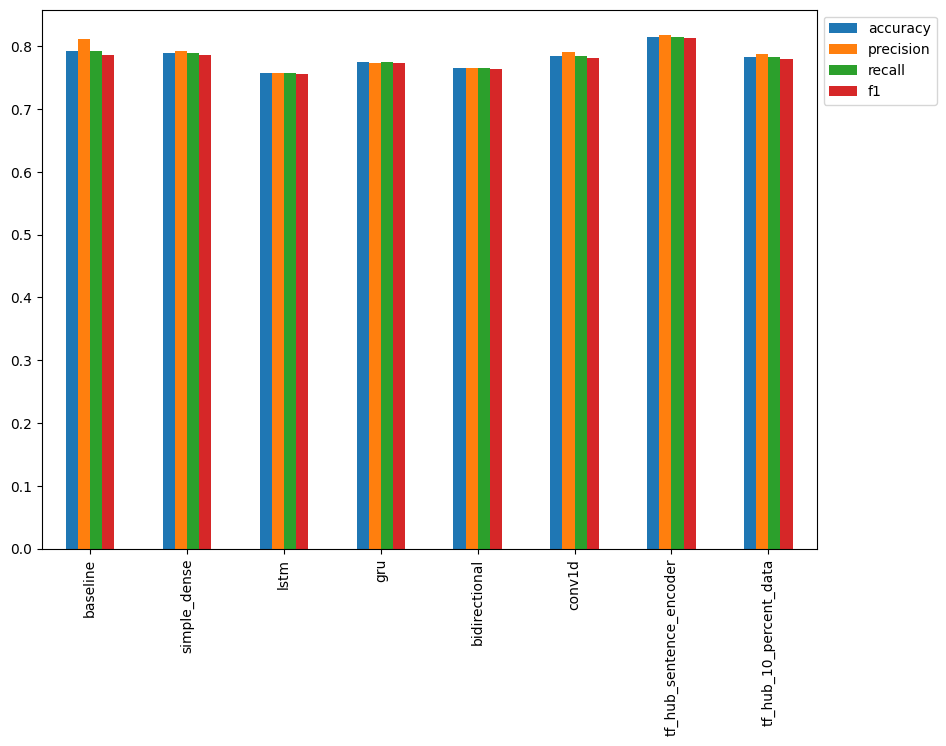

In [114]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));


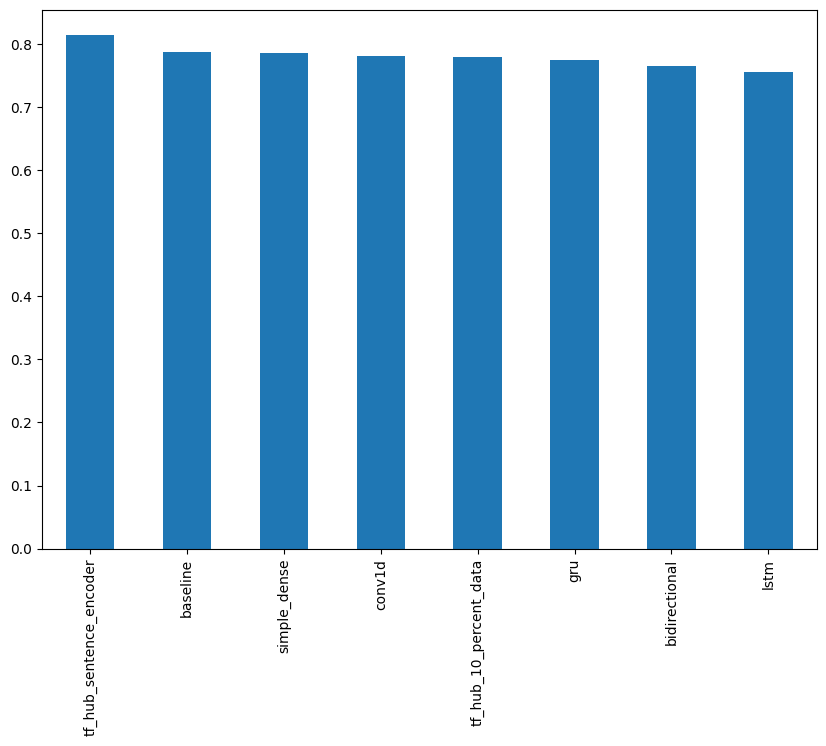

In [115]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));


In [116]:
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})


In [118]:
loaded_model_6.evaluate(val_sentences, val_label)

24/24 [==============================] - 2s 20ms/step - loss: 0.4283 - accuracy: 0.8150


[0.428321897983551, 0.8149606585502625]

In [119]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [120]:
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")


In [121]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_label)

24/24 [==============================] - 1s 9ms/step - loss: 0.4283 - accuracy: 0.8150


[0.428321897983551, 0.8149606585502625]

## Finding the most wrong examples

In [123]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_label,
                       "pred": model_6_pred,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.154377
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.755951
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.987822
3,@camilacabello97 Internally and externally scr...,1,0.0,0.214814
4,Radiation emergency #preparedness starts with ...,1,1.0,0.701705


In [124]:
#  Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.904002
759,FedEx will no longer transport bioterror patho...,0,1.0,0.869317
628,@noah_anyname That's where the concentration c...,0,1.0,0.857099
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.847213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.827383
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.817546
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.801608
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.775813
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.775386
144,The Sound of Arson,0,1.0,0.775129


In [125]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9040018916130066
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8693171739578247
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8570987582206726
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8472126126289368
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8273829221725464
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8175464868545532
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pr

In [126]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.06091200187802315
Text:
Next May I'll be free...from school from obligations like family.... Best of all that damn curfew...

----

Target: 1, Pred: 0, Prob: 0.05901799350976944
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.05730847269296646
Text:
VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK

----

Target: 1, Pred: 0, Prob: 0.05167024955153465
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.05008905380964279
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.04546182602643967
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 

## Making predictions on the test dataset

In [127]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 183ms/step
Pred: 1, Prob: 0.9075927138328552
Text:
Drove past the field on fire yesterday. Reminded me of the bush fires we used to get in South Africa. http://t.co/SN3dHuYnFe

----

1/1 [==============================] - 0s 77ms/step
Pred: 0, Prob: 0.24842777848243713
Text:
@xodeemorgss she went to get rice and the whole thing tipped over so he had like flames on his pants and she was like omg I'm so sorry!??

----

1/1 [==============================] - 0s 34ms/step
Pred: 0, Prob: 0.09865450114011765
Text:
Oops! I say he picked the right car to try hijacking.  https://t.co/SoMgI7hwli

----

1/1 [==============================] - 0s 34ms/step
Pred: 0, Prob: 0.4629889130592346
Text:
This time next week there will be absolute pandemonium in several homes around Westmeath with some carefully... http://t.co/nwfNxs4rIE

----

1/1 [==============================] - 0s 37ms/step
Pred: 1, Prob: 0.9319223761558533
Text:
'Mumbai attack mayhem was planne

## Predicting on Tweets from the wild

In [128]:
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"


In [129]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [130]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=daniels_tweet)

1/1 [==============================] - 0s 68ms/step
Pred: 0.0 (not real disaster) Prob: 0.04830655828118324
Text:
Life like an ensemble: take the best choices from others and make your own


In [131]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 55ms/step
Pred: 1.0 (real disaster) Prob: 0.9604378342628479
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [132]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 55ms/step
Pred: 1.0 (real disaster) Prob: 0.9678391218185425
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon
